<a href="https://colab.research.google.com/github/yongbin02/AI/blob/main/7%EC%A3%BC%EC%B0%A8/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. 데이터 준비
# 패션 MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# 데이터 정규화 (0~255 범위의 픽셀 값을 0~1 범위로 조정)
x_train = x_train / 255.0
x_test = x_test / 255.0

# CNN 모델에 입력하기 위해 데이터 차원 변경 (채널 차원 추가)
# (60000, 28, 28) -> (60000, 28, 28, 1)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# 레이블을 원-핫 인코딩으로 변환
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

# 클래스 이름 정의
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
# 2. CNN 모델 구축
model = Sequential([
    # 첫 번째 합성곱 레이어: 32개의 3x3 필터, 활성화 함수 ReLU
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # 첫 번째 풀링 레이어: 2x2 풀링 윈도우
    MaxPooling2D((2, 2)),
    # 두 번째 합성곱 레이어: 64개의 3x3 필터
    Conv2D(64, (3, 3), activation='relu'),
    # 두 번째 풀링 레이어
    MaxPooling2D((2, 2)),
    # 3D 특성 맵을 1D 벡터로 변환
    Flatten(),
    # 64개의 뉴런을 가진 완전 연결 계층
    Dense(64, activation='relu'),
    # 10개의 뉴런을 가진 출력층 (클래스 수와 동일)
    Dense(10, activation='softmax')
])

In [8]:
# 3. 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# 4. 모델 훈련
history = model.fit(x_train, y_train_categorical, epochs=5,
                    validation_data=(x_test, y_test_categorical))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.7654 - loss: 0.6503 - val_accuracy: 0.8633 - val_loss: 0.3680
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.8810 - loss: 0.3329 - val_accuracy: 0.8897 - val_loss: 0.3128
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.8999 - loss: 0.2737 - val_accuracy: 0.8904 - val_loss: 0.3042
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9123 - loss: 0.2381 - val_accuracy: 0.8974 - val_loss: 0.2713
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9207 - loss: 0.2145 - val_accuracy: 0.9050 - val_loss: 0.2595


In [10]:
# 5. 모델 평가
loss, accuracy = model.evaluate(x_test, y_test_categorical, verbose=2)
print(f'\n테스트 정확도: {accuracy:.4f}')


313/313 - 3s - 11ms/step - accuracy: 0.9050 - loss: 0.2595

테스트 정확도: 0.9050


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


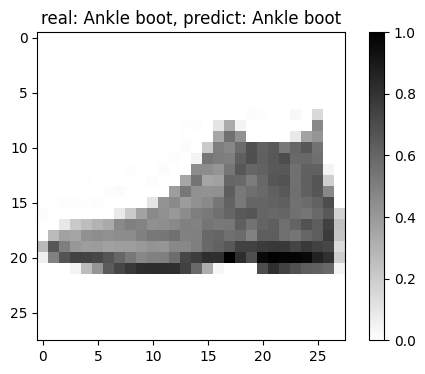

In [12]:
# 6. 예측 및 결과 시각화
# 테스트 데이터의 첫 번째 이미지로 예측 수행
predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[0])
true_label = y_test[0]
plt.figure(figsize=(6, 4))

# CNN 입력은 4차원이므로 시각화를 위해 2차원으로 축소
plt.imshow(np.squeeze(x_test[0]), cmap=plt.cm.binary)
plt.title(f"real: {class_names[true_label]}, predict: {class_names[predicted_label]}")
plt.colorbar()
plt.grid(False)
plt.show()